In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [51]:
# Load dataset
df = pd.read_csv('IBM HR ATTRITION.csv')

# Preview the data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
#DATA CLEANING AND HANDLING
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")



Dataset contains 1470 rows and 35 columns.


In [55]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [57]:
print(f"Number of duplicate records: {df.duplicated().sum()}")


Number of duplicate records: 0


In [59]:
print("Data types:\n", df.dtypes)


Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [61]:
#handle categorical data
categorical_columns = ['Attrition', 'Gender', 'BusinessTravel', 'Department']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [63]:
#DESCRPTIVE STATISTICS
#Summary statistics
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [65]:
#Class distribution for attrition
print("Attrition Distribution:\n", df['Attrition'].value_counts(normalize=True))


Attrition Distribution:
 Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


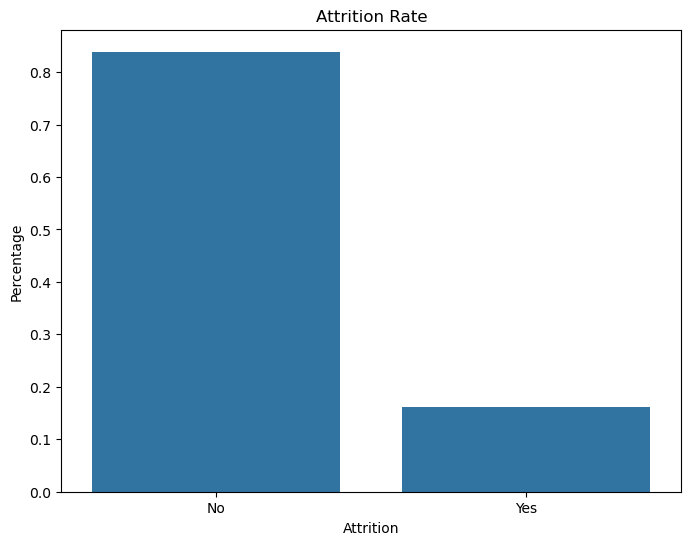

In [67]:
#EXPLORATORY DATA ANALYSIS
#Visualise attrition rate
attrition = df['Attrition'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition.index, y=attrition.values)
plt.title('Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.show()


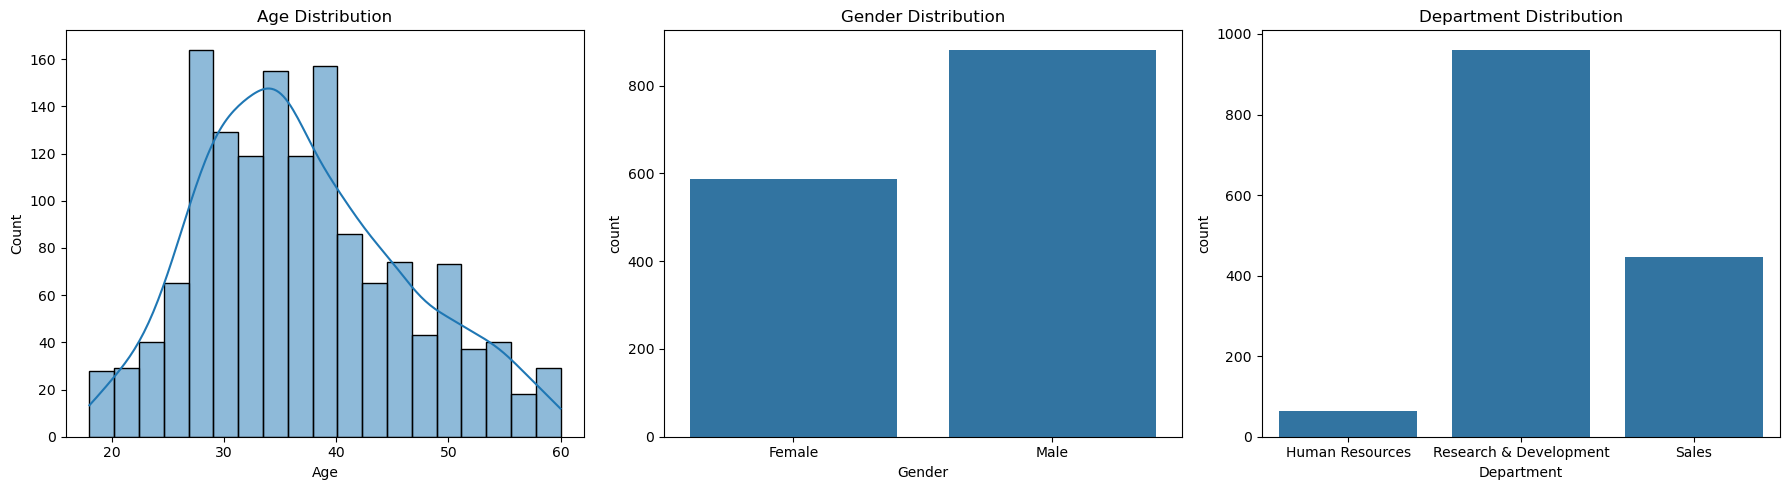

In [69]:
#Analyse demographics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title('Gender Distribution')

sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title('Department Distribution')

plt.tight_layout()
plt.show()


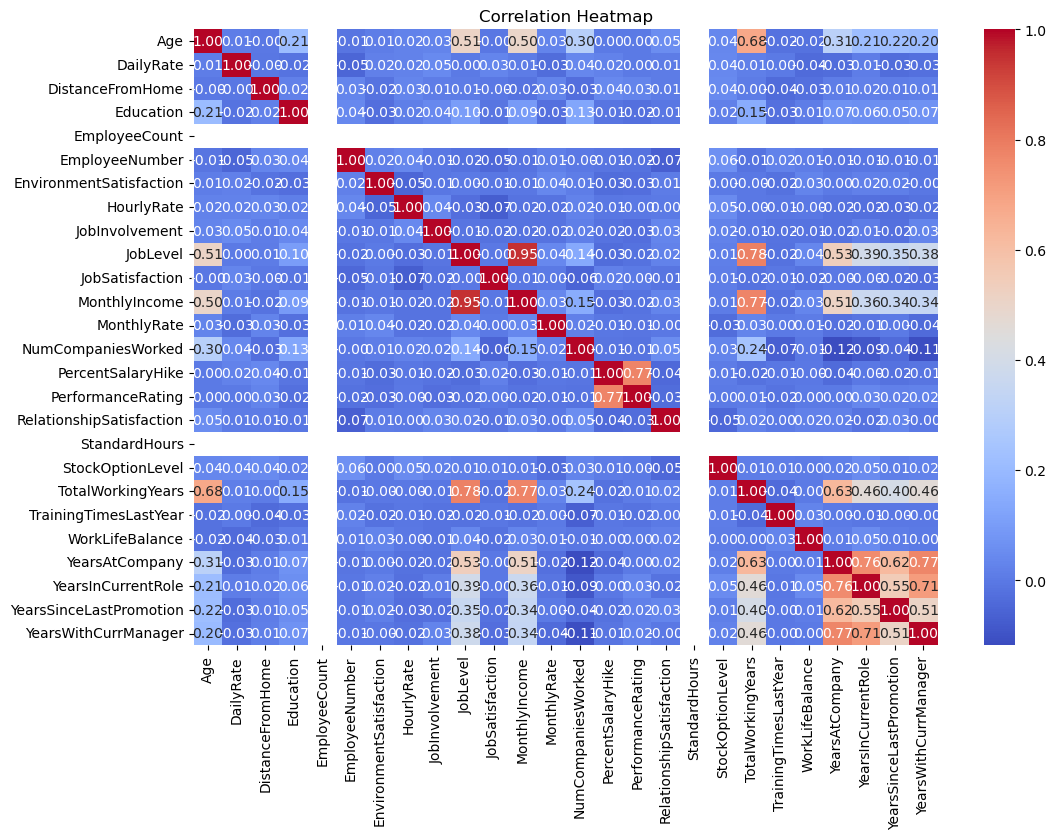

In [71]:
#Correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [73]:
#key metrics calculation
#calculate attrition rate by demographics
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    return attrition_rate.reset_index(name='Attrition Rate')

gender_attrition = calculate_attrition_rate(df, 'Gender')
print(gender_attrition)


   Gender  Attrition Rate
0  Female       14.795918
1    Male       17.006803


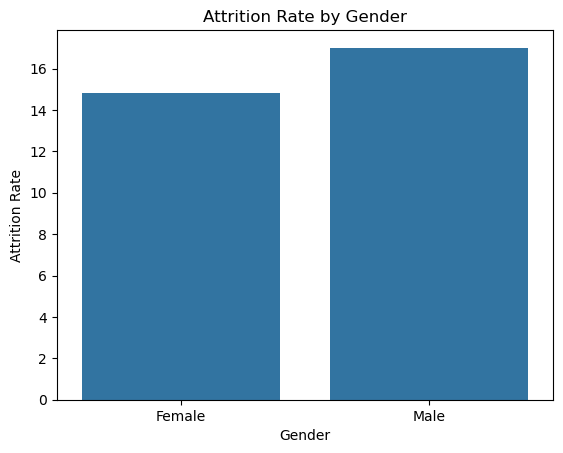

In [75]:
#Attrition rate by gender
sns.barplot(data=gender_attrition, x='Gender', y='Attrition Rate')
plt.title('Attrition Rate by Gender')
plt.show()


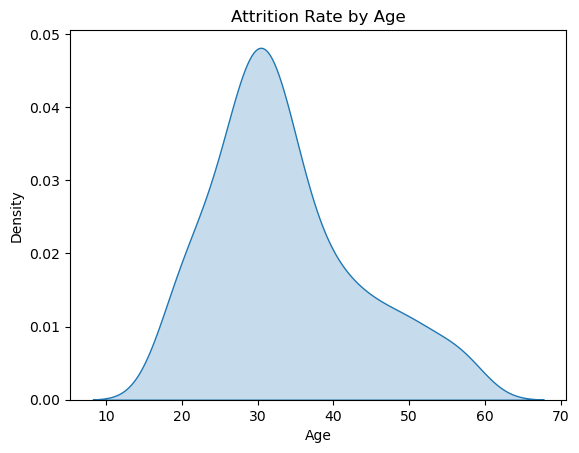

In [77]:
#Attrition rate by age
sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='Age', fill=True)
plt.title('Attrition Rate by Age')
plt.show()


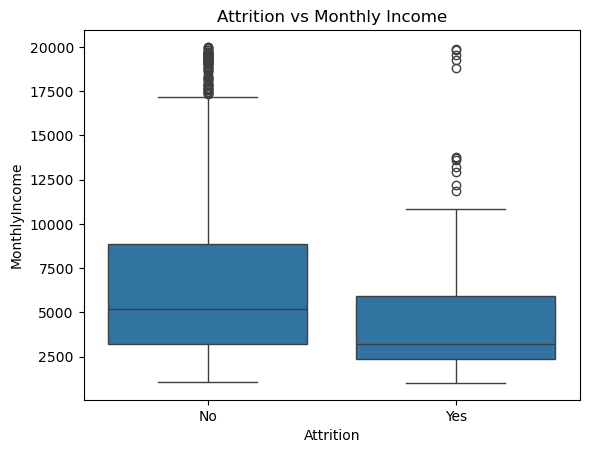

In [79]:
#Attrition by monthly income
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs Monthly Income')
plt.show()


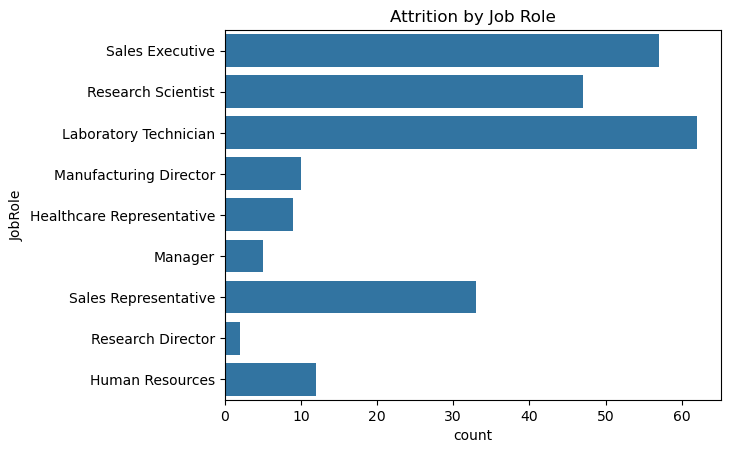

In [81]:
#Attrition by job role 
sns.countplot(data=df[df['Attrition'] == 'Yes'], y='JobRole', order=df['JobRole'].value_counts().index)
plt.title('Attrition by Job Role')
plt.show()


   Gender  AttritionRate
0  Female      14.795918
1    Male      17.006803


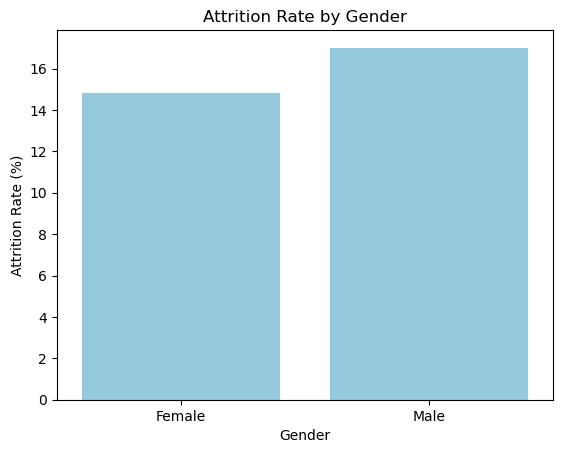

In [83]:
# Function to Calculate Attrition Rate
def calculate_attrition_rate(df, column):
# Group by the column and 'Attrition', then count occurrences
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    
# Calculate attrition rate for each category in the column
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100

# Create a DataFrame with the column and attrition rate
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df
# Calculate attrition rate by Gender
attrition_rate_gender = calculate_attrition_rate(df, 'Gender')

# Display the result
print(attrition_rate_gender)
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Plot of Attrition Rate by Gender
sns.barplot(data=attrition_rate_gender, x='Gender', y='AttritionRate', color='skyblue')
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.show()

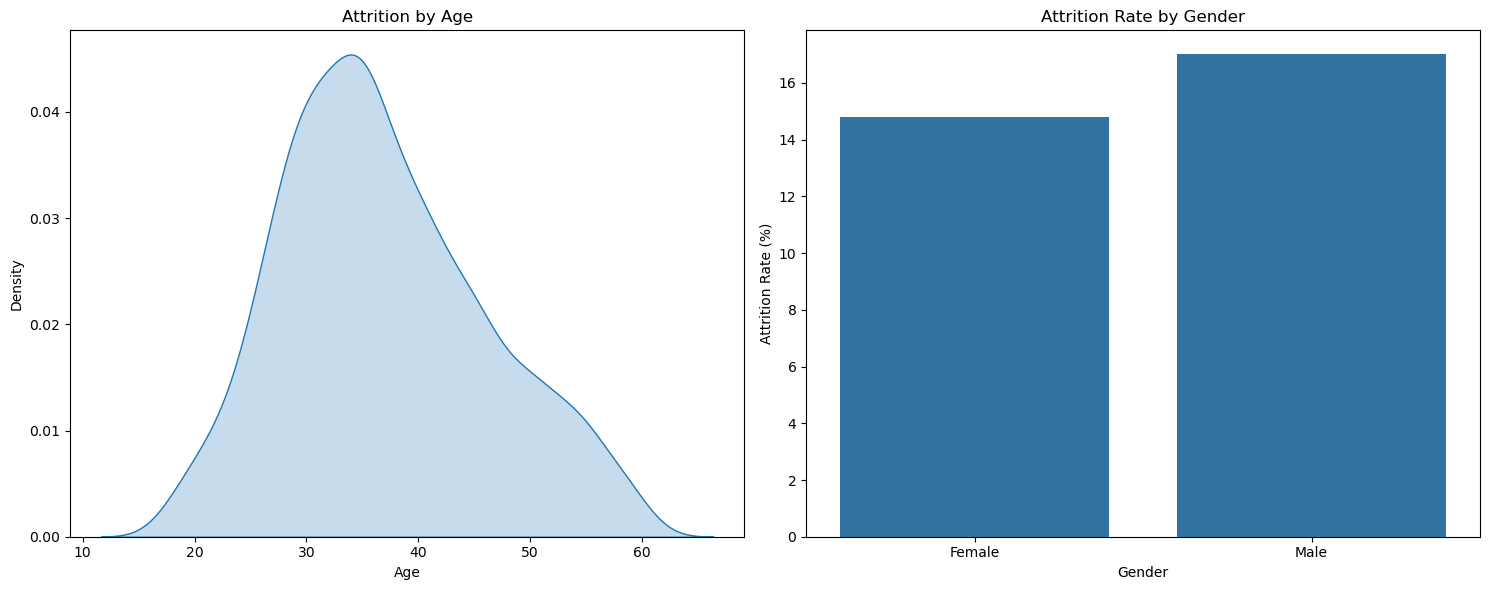

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#Attrition by ag
sns.kdeplot(data=df, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
#
attrition_rate_df = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()



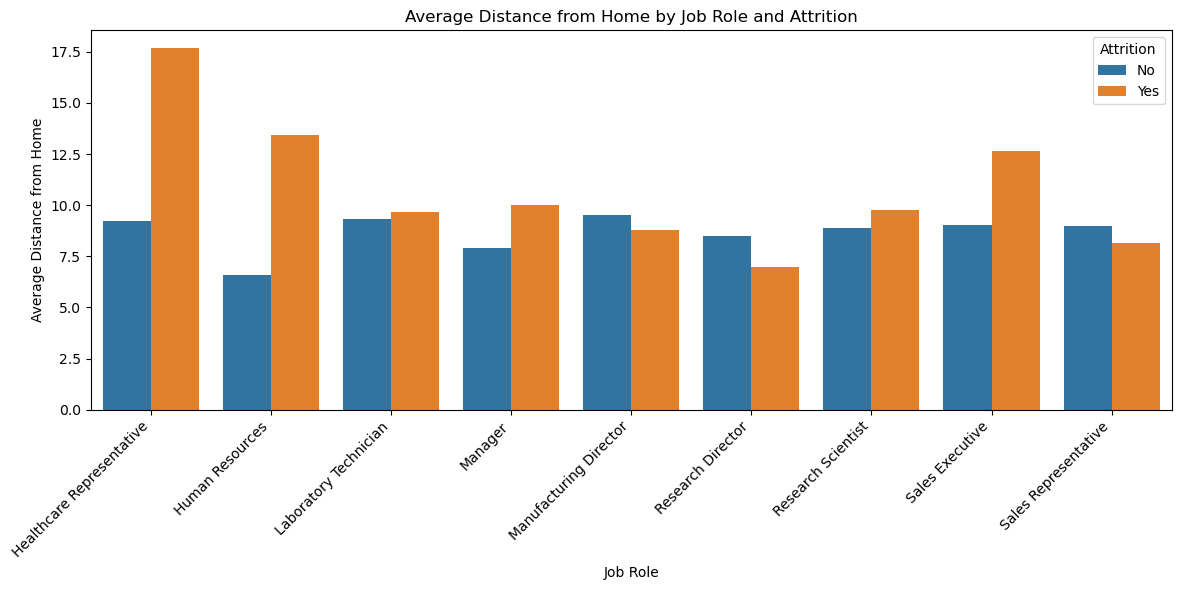

In [87]:
#Breakdown of Distance from Home by Job Role and Attrition
# Group data by JobRole and Attrition, then calculate average DistanceFromHome
distance_analysis = df.groupby(['JobRole', 'Attrition'])['DistanceFromHome'].mean().reset_index()

# Visualize the breakdown
plt.figure(figsize=(12, 6))
sns.barplot(data=distance_analysis, x='JobRole', y='DistanceFromHome', hue='Attrition')
plt.title('Average Distance from Home by Job Role and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Average Distance from Home')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


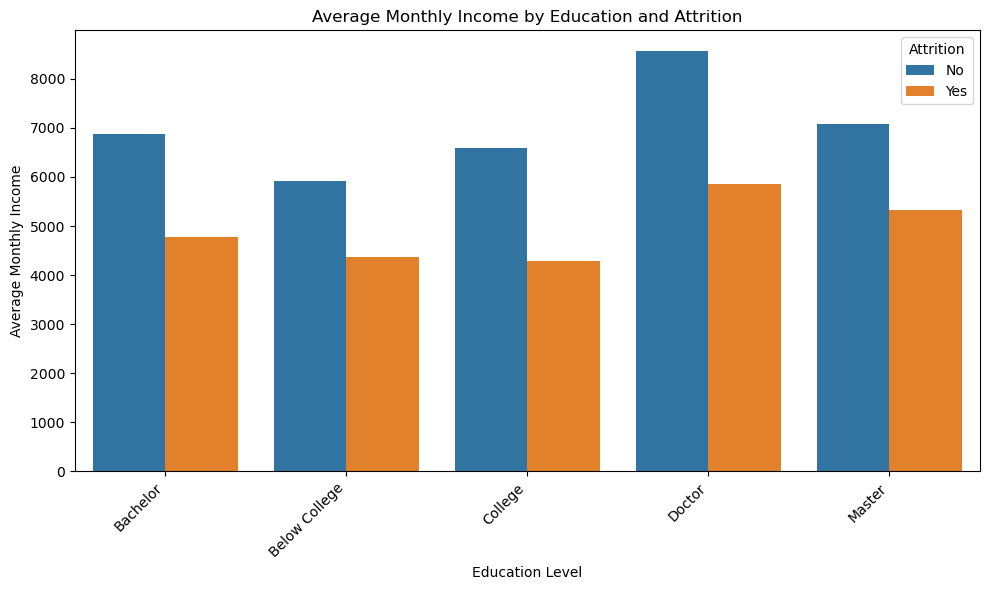

In [89]:
# Map Education levels to meaningful labels
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['Education'] = df['Education'].map(education_mapping)

# Group data by Education and Attrition, then calculate average MonthlyIncome
income_analysis = df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=income_analysis, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education and Attrition')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Attrition Rates (%):
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


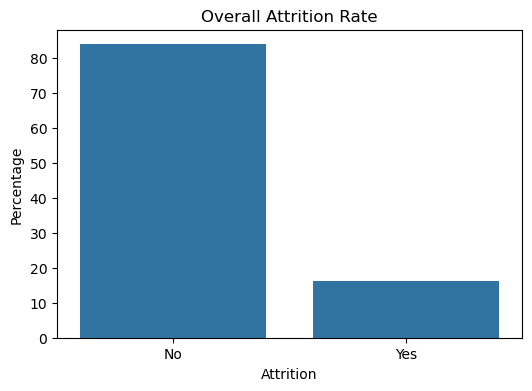

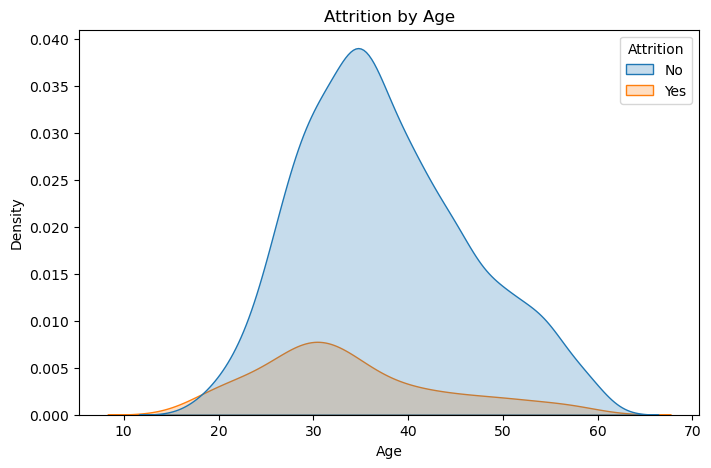

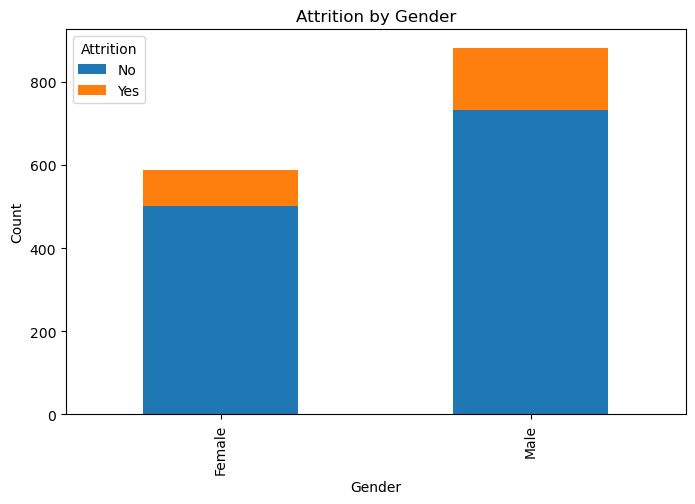

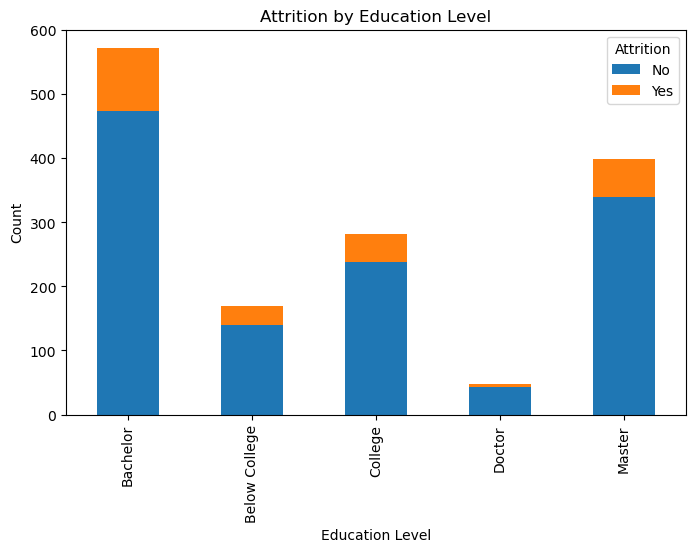

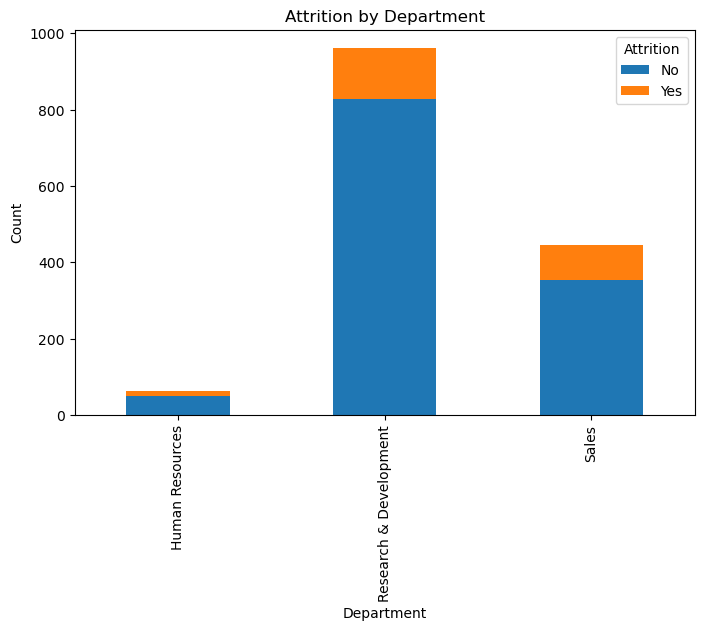

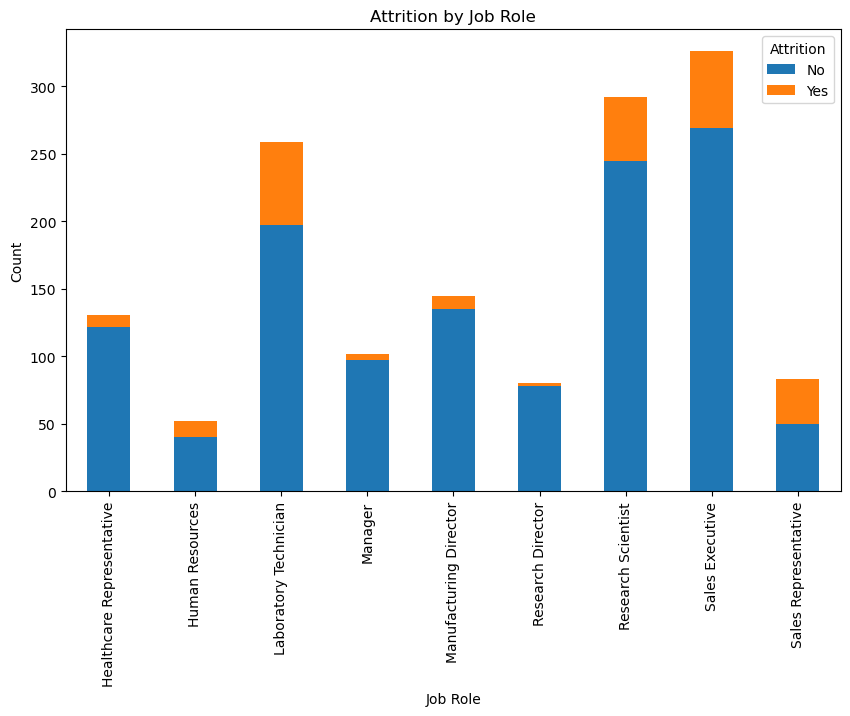

In [91]:
#Understand Current Turnover Rates:
#Gain a comprehensive understanding of the current employee turnover rate and analyze the demographic distribution ofattrition by-
#age, gender, education, department, and job role

#Calculate the overall attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rates (%):\n", attrition_rate)
# Visualize attrition rates
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
plt.title('Overall Attrition Rate')
plt.ylabel('Percentage')
plt.xlabel('Attrition')
plt.show()

#Demodraphic distribution of attrition rate by age
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#Demographic distribution of attrition rate by gender
gender_attrition = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
gender_attrition.plot(kind='bar', figsize=(8, 5), stacked=True)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

#Demographic distribution of attrition by education
education_attrition = df.groupby(['Education', 'Attrition']).size().unstack(fill_value=0)
education_attrition.plot(kind='bar', figsize=(8, 5), stacked=True)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

#Demographic distribution of attrition by department
department_attrition = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
department_attrition.plot(kind='bar', figsize=(8, 5), stacked=True)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

#Demographic distribution of attrition by job role
jobrole_attrition = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
jobrole_attrition.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()



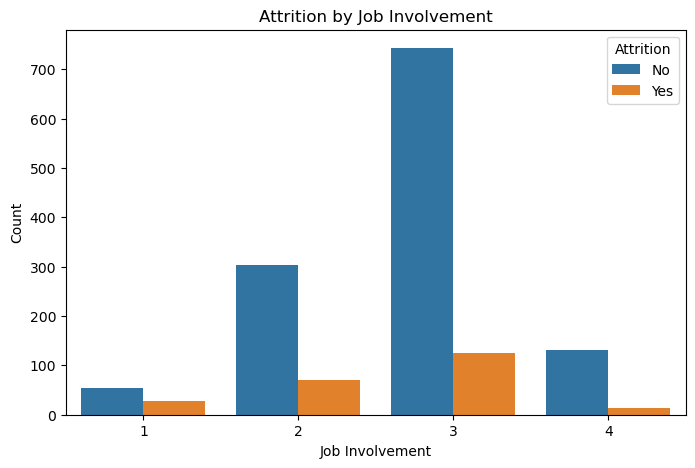

In [93]:
#Identify Key Factors Influencing Turnover
#job satisfaction indicators

#Job involvement
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobInvolvement', hue='Attrition')
plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


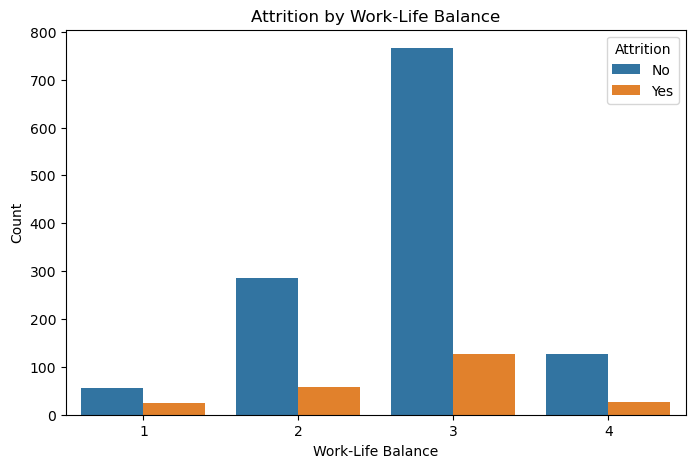

In [95]:
#Work life balance
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


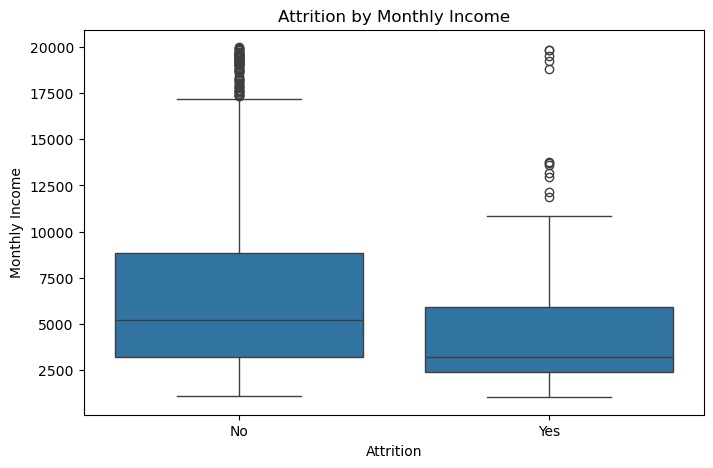

In [97]:
#Monthly income
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition by Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


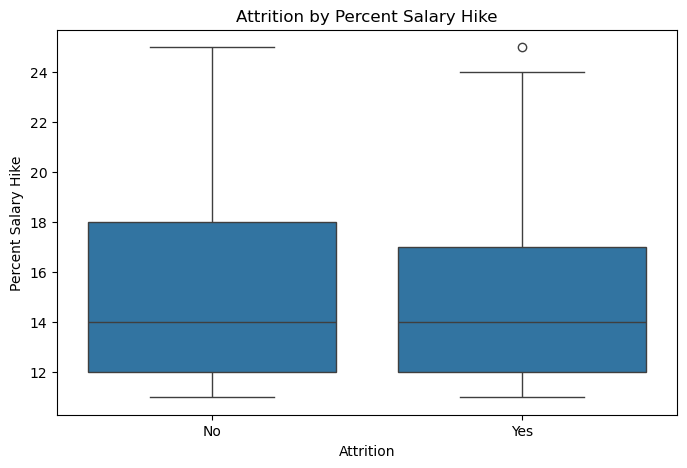

In [99]:
#Percent salary hike
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike')
plt.title('Attrition by Percent Salary Hike')
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.show()


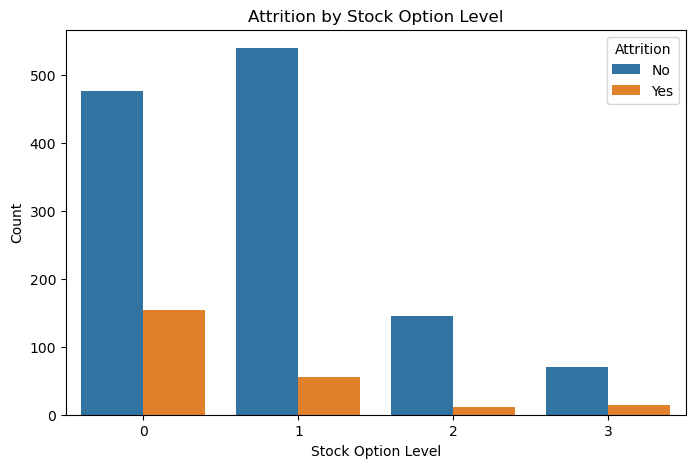

In [101]:
#Stock option level
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='StockOptionLevel', hue='Attrition')
plt.title('Attrition by Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()
